## Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

### Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

### Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as st 
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39


In [10]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [12]:
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [13]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [14]:
(65441/len(df))*100

1.021716132126611

In [15]:
df.dropna(inplace=True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [16]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [17]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(3007861, 5)

In [20]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [21]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [22]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)& (df['passenger_count']<6)]

In [23]:
df.shape

(2780283, 5)

In [24]:
df['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

In [25]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [26]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [27]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [28]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x1ac9ac18d70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac9ac19370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac4ba95d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac9ac19970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac9ac19c40>],
 'means': []}

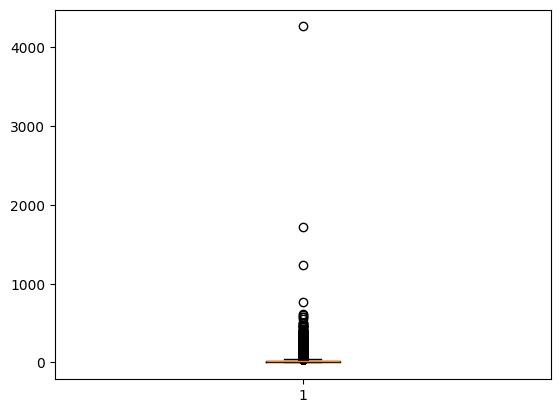

In [29]:
plt.boxplot(df['fare_amount'])

In [30]:
for col in['fare_amount','trip_distance','duration'] :
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3  - q1 

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df= df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [31]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


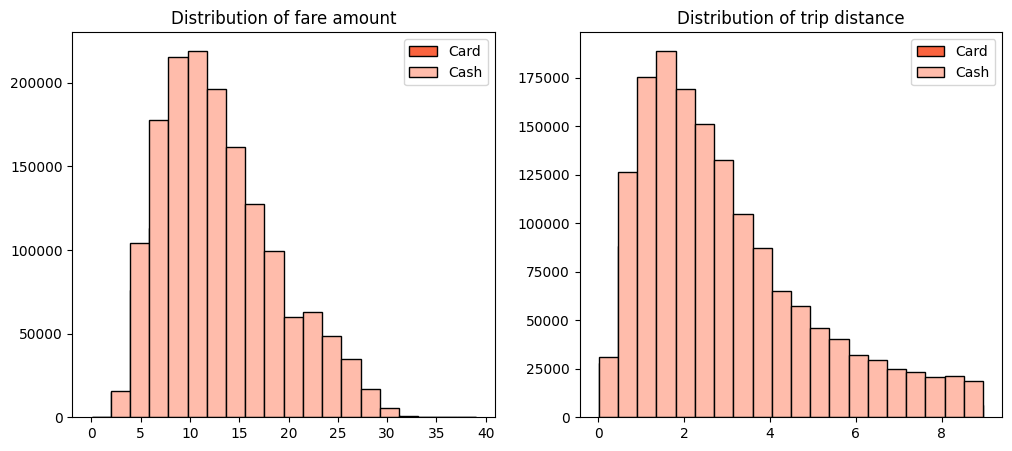

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor = 'k', color= '#FFBCAB', label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label='Card')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor = 'k', color= '#FFBCAB', label='Cash')
plt.legend()
plt.show()

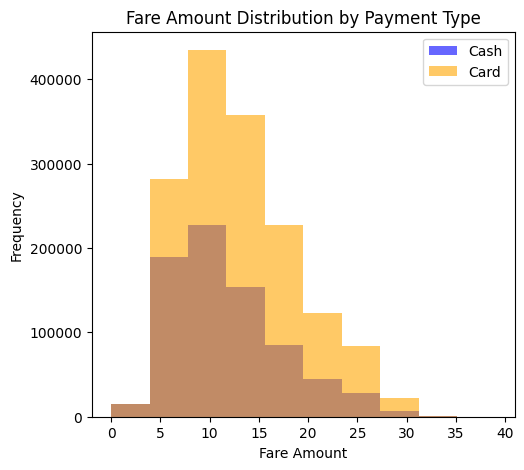

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Plot histograms with different colors and labels
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], 
         color='blue', alpha=0.6, label='Cash')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], 
         color='orange', alpha=0.6, label='Card')

# Add legend
plt.legend()
plt.title("Fare Amount Distribution by Payment Type")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

plt.show()


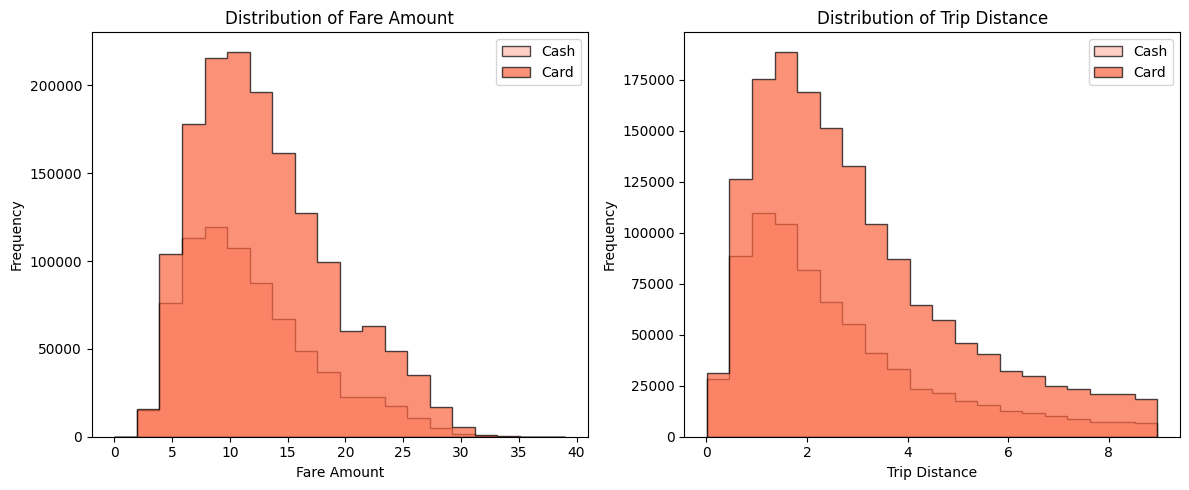

In [34]:
plt.figure(figsize=(12, 5))

# Plot 1: Fare Amount Distribution
plt.subplot(1, 2, 1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], 
         histtype='stepfilled', bins=20, edgecolor='k', color='#FFBCAB', label='Cash', alpha=0.7)
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], 
         histtype='stepfilled', bins=20, edgecolor='k', color='#FA643F', label='Card', alpha=0.7)
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.legend()

# Plot 2: Trip Distance Distribution
plt.subplot(1, 2, 2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], 
         histtype='stepfilled', bins=20, edgecolor='k', color='#FFBCAB', label='Cash', alpha=0.7)
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], 
         histtype='stepfilled', bins=20, edgecolor='k', color='#FA643F', label='Card', alpha=0.7)
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.legend()

# Show both subplots together
plt.tight_layout()
plt.show()


In [35]:
df.groupby('payment_type').agg({'fare_amount' : ['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

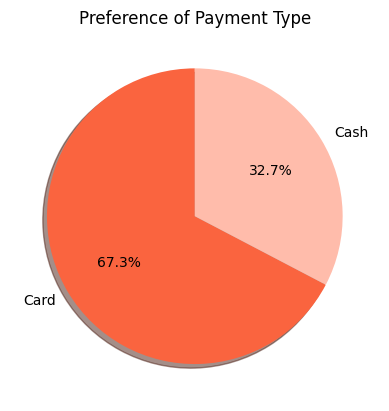

In [36]:
# plt.title('Preference of Payment Type')
# plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts().index,
#        startangle=90, shadow=True, autopct='%1.1f%%', colors=['#FA643F','#FFBCAB'])
# plt.show()

plt.title('Preference of Payment Type')
plt.pie(
    df['payment_type'].value_counts(normalize=True),  # proportions
    labels=df['payment_type'].value_counts().index,   # labels
    startangle=90,                                    # start from top
    shadow=True,                                      # nice shadow effect
    autopct='%1.1f%%',                                # show percentages
    colors=['#FA643F', '#FFBCAB']                     # custom colors
)
plt.show()


In [37]:
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
Cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

In [38]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [39]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [40]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [41]:
df1 = df.copy()

In [42]:
df = pd.DataFrame(columns= ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


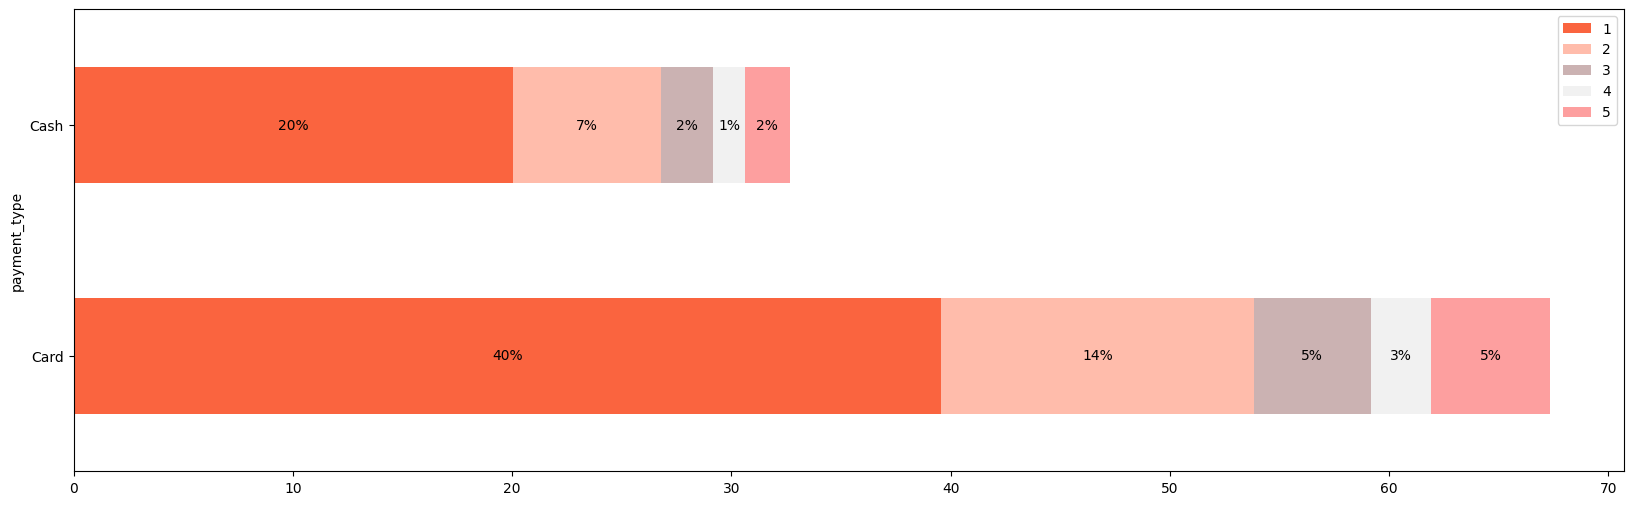

In [43]:
fig, ax = plt.subplots(figsize=(20,6))
df.plot(x='payment_type', kind = 'barh', stacked = True,ax = ax, color = ['#FA643F', '#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

# Add percentage text 
for p in ax.patches:
    width = p.get_width() 
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, 
           y+height/2, 
           '{:.0f}%'.format(width), 
           horizontalalignment='center',
           verticalalignment = 'center')

#### Null hypothesis: 
There is no difference in average fare between customers who use credit cards and customers who use cash.
#### Alternative hypothesis: 
There is a difference in average fare between customers who use credit cards and customers who use cash.

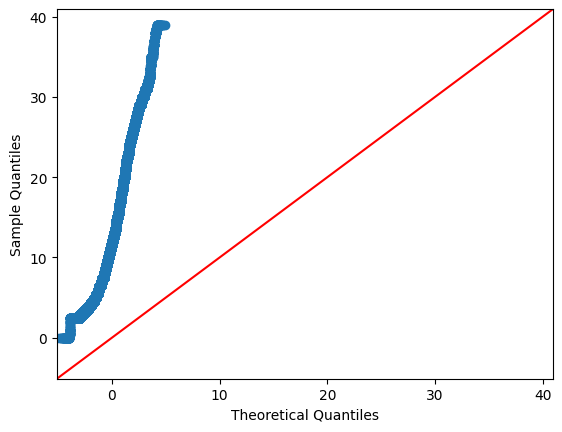

In [44]:
import statsmodels.api as sm 
sm.qqplot(df1['fare_amount'], line = '45')
plt.show()

In [45]:
card_sample = df1[df1['payment_type']=='Card']['fare_amount']
cash_sample = df1[df1['payment_type']=='Cash']['fare_amount']

In [46]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var= False)
print('T statistics', t_stats, 'p-value',p_value)

T statistics 169.2111527245052 p-value 0.0
